In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from matplotlib import cm
import quantecon as qe
from model_simple import FireProblem

In [2]:
# === input wage data === #
w = np.ones(1)*10

In [3]:
# === solve for the value function === #
fp = FireProblem(w, y_0=-0.1, sig2_0=0.1, sig2_star=0.2, sp=2, st=.01)
v_init = np.ones((fp.n, fp.y.size, fp.t.size))*100
v = qe.compute_fixed_point(fp.bellman_operator, v_init, error_tol=1e-3, print_skip=1, max_iter=1000)

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
1            4.557e+01      8.441e+00         
2            3.152e+01      1.661e+01         
3            2.188e+01      2.440e+01         
4            1.519e+01      3.215e+01         
5            8.261e-01      4.005e+01         
6            6.393e-04      4.831e+01         


In [4]:
# === solve for the optimal policy === #
optimal_policy = fp.get_greedy(v)

In [5]:
%matplotlib inline

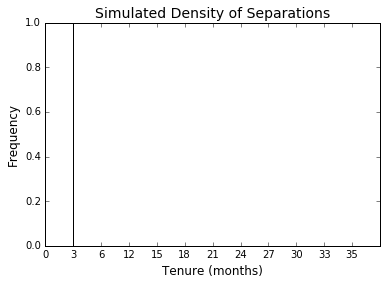

In [6]:
# === histogram of firings === #
beliefs = fp.firm_beliefs()
bins = fp.firing_bins(optimal_policy,beliefs) # simulated moments

L = len(bins)
ind = np.arange(L)  # the locations for the bars
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(ind, bins, width, color='r')

ax.set_xlabel('Tenure (months)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Simulated Density of Separations', fontsize=14)

ax.set_xlim(0,fp.T_star+1)
labels = [0, 3, 6, 12, 15, 18, 21, 24, 27, 30, 33, 35]
plt.xticks(np.linspace(0, fp.T_star+1, (fp.T_star+1)/fp.T_k+1), labels)

plt.show()

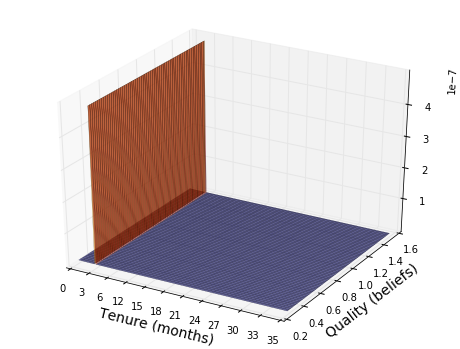

In [7]:
# === plot value function (for some worker) === #
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
tg, yg = np.meshgrid(fp.t, fp.y)
ax.plot_surface(tg,
                yg,
                v[0,:,:], #for worker 0
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.5,
                linewidth=0.25)
ax.set_zlim(np.amin(v[0,:,:]), np.amax(v[0,:,:]))
ax.set_xlabel('Tenure (months)', fontsize=14)
ax.set_ylabel('Quality (beliefs)', fontsize=14)
ax.set_xlim(0,fp.T_star)
labels = [0, 3, 6, 12, 15, 18, 21, 24, 27, 30, 33, 35]
plt.xticks(np.linspace(0, fp.T_star+1, (fp.T_star+1)/fp.T_k), labels)
plt.show()

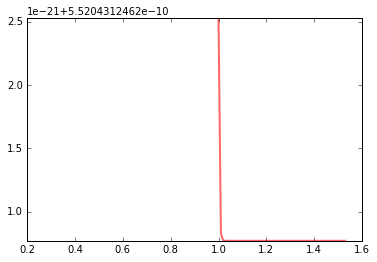

In [8]:
fig, ax = plt.subplots()
x = fp.y
y = v[0,:,365]
ax.set_ylim(np.amin(v[0,:,365]), np.amax(v[0,:,365]))
ax.plot(x, y, 'r-', linewidth=2, alpha=0.6)
plt.show()

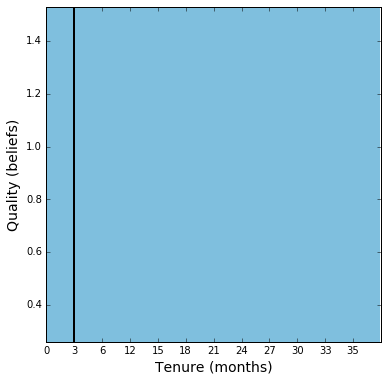

In [9]:
# === plot the optimal policy (for some worker) === #
fig, ax = plt.subplots(figsize=(6,6))
tg, yg = np.meshgrid(fp.t, fp.y)
lvls=(-0.5, 0.5)
ax.contourf(tg, yg, optimal_policy[0,:,:], levels=lvls, cmap=cm.winter, alpha=0.5) #for worker 0
ax.contour(tg, yg, optimal_policy[0,:,:], colors='k', levels=lvls, linewidths=1) #for worker 0
ax.set_xlabel('Tenure (months)', fontsize=14)
ax.set_ylabel('Quality (beliefs)', fontsize=14)
ax.set_xlim(0,fp.T_star+1)
labels = [0, 3, 6, 12, 15, 18, 21, 24, 27, 30, 33, 35]
plt.xticks(np.linspace(0, fp.T_star+1, (fp.T_star+1)/fp.T_k+1), labels)
plt.show()

In [10]:
# np.unique(np.where(optimal_policy==2)[0]) #check workers who have potential firings
# np.unique(np.where(optimal_policy==1)[2]) #check periods of potential firings
# np.where(optimal_policy[:,:,30]==2) #check workers/beliefs who are fired in a given period